# ErSE 394 — Geo-Environmental Modeling & Analysis
## Assignment 5 (Analysis of the 2009 Jeddah Storm Using Geostationary Satellite Data)

### Link to the repository: [https://github.com/Sara-Iftikhar/geo_env](https://github.com/Sara-Iftikhar/geo_env)

### Part 01

#### Question 01 (GridSat imagery is available for four bands: visible approximately 0.6 μm, shortwave infrared approximately 3.8 μm, water vapor approximately 6.7 μm, and longwave infrared approximately 12.0 μm. Which band is most suitable for rainfall estimation?)
The longwave infrared band is typically the most suitable for rainfall estimation. This is because this band is sensitive to cloud-top temperature, and colder cloud tops are associated with higher, colder clouds that often indicate the presence of intense convection and| precipitation.

### Part 02

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
path = os.path.join(os.getcwd(), 'data', 'Geostationary_Satellite_Data')
if not os.path.exists(path):
      os.mkdir(path)

#### 1. Open one of the netCDF files

In [3]:
fpath = os.path.join(path, 'GRIDSAT-B1.2009.11.25.00.v02r01.nc')
dset = xr.open_dataset(fpath)

In [4]:
dset

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 5143, time: 1, Ngeo: 5, sparse3ir: 1280634,
                    sparse2vs: 2717873, sparse2ir: 2, sparse2wv: 2)
Coordinates:
  * lat            (lat) float32 -70.0 -69.93 -69.86 ... 69.79 69.86 69.93
  * lon            (lon) float32 -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
  * time           (time) datetime64[ns] 2009-11-25
  * sparse2ir      (sparse2ir) int32 0 1
  * sparse2wv      (sparse2wv) int32 0 1
  * sparse2vs      (sparse2vs) int32 936 937 938 ... 10284808 10284809 10284810
  * sparse3ir      (sparse3ir) int32 476493 481633 481634 ... 9811022 9816163
Dimensions without coordinates: Ngeo
Data variables: (12/25)
    satlat         (time, Ngeo) float32 ...
    satlon         (time, Ngeo) float32 ...
    satrad         (time, Ngeo) float32 ...
    satname        (time, Ngeo) |S50 ...
    b1ufile        (time, Ngeo) |S50 ...
    b1file         (time, Ngeo) |S50 ...
    ...             ...
    vschn_2        (time, sparse2vs) float32 ...
    satid_ir       (time, lat, lon) float32 ...
    satid_wv       (time, lat, lon) int8 ...
    satid_vs       (time, lat, lon) int8 ...
    satid_ir3      (sparse3ir) int8 ...
    irwin_vza_adj  (time, lat, lon) float32 ...
Attributes: (12/50)
    title:                      GridSat-B1 - Gridded Satellite (GridSat) ISCC...
    summary:                    Geostationary data are remapped to equal angl...
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    references:                 http://dx.doi.org/10.1175/2011BAMS3039.1  htt...
    source:                     ISCCP.B1U.a.FY2-C.2009.11.25.0000.CMA.gz,ISCC...
    ...                         ...
    _satid:                     _satid attributes are comma delimited arrays ...
    Satellite_Name_satid:       FY-2C,GOES-11,GOES-12,Meteosat-7,Meteosat-9
    B1U_File_satid:             ISCCP.B1U.a.FY2-C.2009.11.25.0000.CMA.gz,ISCC...
    IRWIN_calibration_file:     b1u.calibration.correction.IRWIN.v17
    IRWVP_calibration_version:  v01
    Corrections:                IRWIN has VZA correction, All channels have p...

#### 2. Our focus is the longwave infrared data, labeled as irwin cdr in the netCDF files. Load this data with:

In [5]:
IR = np.array(dset.variables['irwin_cdr']).squeeze()
IR.shape

(2000, 5143)

#### 3. Typically, geospatial raster data are arranged from north to south. In contrast, this dataset is ordered from south to north.

In [6]:
IR = np.flipud(IR)

#### 4. Replace missing values, identified as −31999, with NaNs (Not a Number)

In [7]:
#IR[IR==-31999] = np.NaN

#### 5. Apply a scale of 0.01 and an offset of 200 to the raw satellite data to obtain brightness temperatures in kelvin

In [8]:
IR = IR*0.01+200

#### 6. Convert the temperatures from kelvin (K) to degrees Celsius (◦C) for easier interpretation

In [9]:
IR = IR-273.15

#### 7. Plot the data with a colorbar

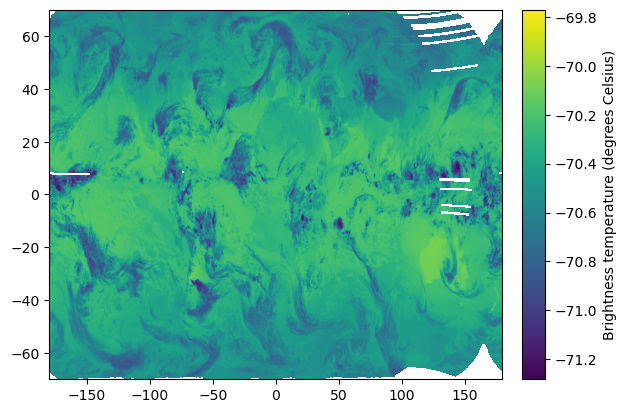

In [10]:
from easy_mpl import imshow
imshow(IR, extent=[-180.035, 180.035, -70.035, 70.035], aspect='auto',
            colorbar=True,
            cbar_params=dict(title="Brightness temperature (degrees Celsius)"))

#### 8. Mark Jeddah’s location on the map for orientation

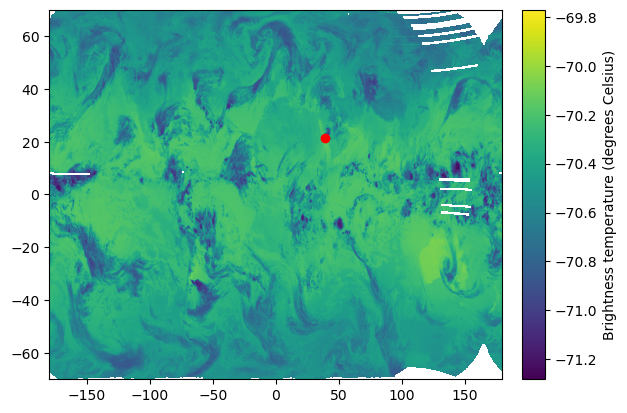

(<Axes: >, <matplotlib.collections.PathCollection at 0x2c9033bf8c0>)

In [11]:
from easy_mpl import scatter

ax = imshow(IR, extent=[-180.035, 180.035, -70.035, 70.035], aspect='auto',
            colorbar=True,
            cbar_params=dict(title="Brightness temperature (degrees Celsius)"),
            show=False)

jeddah_lat = 21.5
jeddah_lon = 39.2

scatter(jeddah_lon, jeddah_lat, color='red', marker='o', label='Jeddah', ax=ax.axes)

#### 9. Identify the different continents on the map. What is the cause of the discontinuity around 80.8◦ longitude east?
The Australian continent can be clearly seen on the map. 

#### 10. Why is there no data beyond approximately 70◦ north and south?
There can be various factors that contribute to the limitation of data coverage beyond 
approximately 70◦ north and south which includes 'setallite orbit design',
'instrument field of view', 'data quality and calibration' and 
'instrumental constrainsts' etc.

#### 11. Why is brightness temperature, rather than reflectance, used as the preferred method for expressing longwave infrared data?
Brightness temperature is preferred over reflectance for expressing longwave infrared data, because relectance is negligible
in LWIR. This is because most materials absorb and re-emit LWIR radiation very efficiently, leaving little to be reflected.

In [12]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

#### 12. What is the spatial resolution of the dataset, expressed in kilometers?

In [13]:
latitude_range = (-70, 70)
longitude_range = (-180, 180)

# Calculate degrees per pixel
degrees_per_pixel_lat = (latitude_range[1] - latitude_range[0]) / IR.shape[0]
degrees_per_pixel_lon = (longitude_range[1] - longitude_range[0]) / IR.shape[1]

# Calculate spatial resolution in kilometers
lat1, lat2 = (latitude_range[0], latitude_range[1])
lon1, lon2 = (0, 0)  # Assuming the calculation is along the equator (latitudes 0 degrees)
distance_lat = haversine(lat1, lon1, lat2, lon2)

lon1, lon2 = (longitude_range[0], longitude_range[1])
distance_lon = haversine(lat1, lon1, lat1, lon2)

spatial_resolution_km = degrees_per_pixel_lat * distance_lat, degrees_per_pixel_lon * distance_lon

print("Degrees per Pixel (Latitude):", degrees_per_pixel_lat)
print("Degrees per Pixel (Longitude):", degrees_per_pixel_lon)
print("Spatial Resolution (Kilometers per Pixel):", spatial_resolution_km)

Degrees per Pixel (Latitude): 0.07
Degrees per Pixel (Longitude): 0.0699980556095664
Spatial Resolution (Kilometers per Pixel): (1089.7102811166753, 3.7358214688650375e-14)


#### Part 3

#### 1. Do lower brightness temperatures indicate higher or lower rainfall rates? Why?


#### 2. Apply this formula to the GridSat brightness temperature data. Ensure you convert the brightness temperatures back to kelvin before applying the formula.

In [14]:
dset_00 = xr.open_dataset(os.path.join(path, 'GRIDSAT-B1.2009.11.25.00.v02r01.nc'))
dset_03 = xr.open_dataset(os.path.join(path, 'GRIDSAT-B1.2009.11.25.03.v02r01.nc'))
dset_06 = xr.open_dataset(os.path.join(path, 'GRIDSAT-B1.2009.11.25.06.v02r01.nc'))
dset_09 = xr.open_dataset(os.path.join(path, 'GRIDSAT-B1.2009.11.25.09.v02r01.nc'))
dset_12 = xr.open_dataset(os.path.join(path, 'GRIDSAT-B1.2009.11.25.12.v02r01.nc'))

In [15]:
dsets = [dset_00, dset_03, dset_06, dset_09, dset_12]
rr_jeddah = []

In [16]:
for dset in dsets:
    IR = (np.flipud(np.array(dset.variables['irwin_cdr']).squeeze()))*0.01+200
    
    A = 1.1183e11
    b = 3.6382e-2
    c = 1.2
    
    rainfall_rates = A * np.exp(-b * pow(IR,c))
    rr = xr.DataArray(rainfall_rates, dims=("lat", "lon"), coords={"lat": dset.variables['lat'], "lon": dset.variables['lon']})
    
    jeddah_lat = 21.492500
    jeddah_lon = 39.177570
    
    # Find nearest grid points in the model dataset for 1850
    nearest_lat_index = abs(rr['lat'] - jeddah_lat).argmin().item()
    nearest_lon_index = abs(rr['lon'] - jeddah_lon).argmin().item()
    
    # Extract data at Jeddah's location
    jeddah_data = rr.isel(lat=nearest_lat_index, lon=nearest_lon_index)
    rr_jeddah.append(jeddah_data.data.item())

In [17]:
import pandas as pd
time_index = ['20091125 00:00', '20091125 03:00', '20091125 06:00', '20091125 09:00', '20091125 12:00']
rr_jeddah_series = pd.Series(rr_jeddah, index=pd.to_datetime(time_index))

In [18]:
rr_jeddah_series

2009-11-25 00:00:00    58.847549
2009-11-25 03:00:00    58.918991
2009-11-25 06:00:00    59.055454
2009-11-25 09:00:00    58.884827
2009-11-25 12:00:00    58.918991
dtype: float64

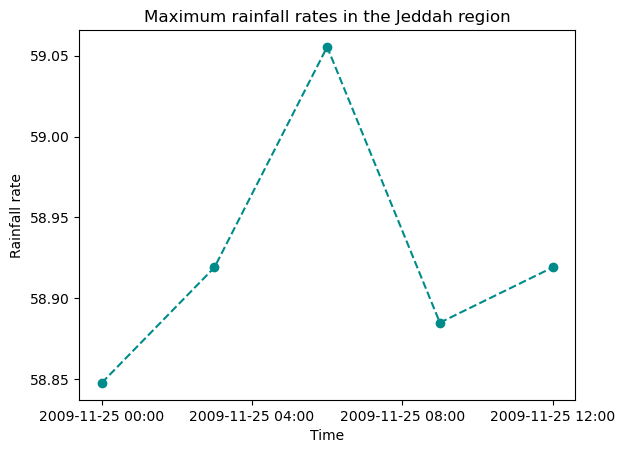

In [19]:
from easy_mpl import plot
import matplotlib.dates as mdates
ax = plot(rr_jeddah_series, '--o', color='darkcyan', show=False,
          ax_kws=dict(
                    xlabel="Time",
                    ylabel="Rainfall rate",
                    title='Maximum rainfall rates in the Jeddah region'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

#### 4. What are some limitations of estimating rainfall using longwave infrared data from geostationary satellites?
Rainfall estimation using longwave infrared data from geostationary satellites have some limitations which includes difficulty in calculating intensity of rainfall from top cloud temperature, identifying precipitaion type and thick multilayered clouds which can cause difficulty in measuring precipitation beneath them.

#### 5. Can you propose a more effective method for quantifying the rainfall associated with the 2009 Jeddah storm?
A combination of rainfall estimation using longwave infrared data from geostationary satellites with other methods and data sources can be an effective way to quantify the rainfall associated with the 2009 Jeddah storm or any specific weather event. Other methods include prediction of such events using machine learning algorithms based on the available historical data, collecting precipitation data from the local weather station and by analyzing post storm flood and damage.